# **Arboles y Random Forest para Regresión**

In [8]:
install.packages("tree")
library("tree")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Aquí ajustamos un árbol de regresión al conjunto de datos de Boston. En primer lugar, creamos y ajustamos el árbol a los datos de entrenamiento.

- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town.
- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk minus 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in $1000's

In [5]:
Boston<-read.csv("Boston.csv", header=TRUE)
str(Boston)

'data.frame':	506 obs. of  15 variables:
 $ X      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : int  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [6]:
Boston<-Boston[,-1]

In [7]:
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : int  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [ ]:
set.seed(1)
train <- sample(1:nrow(Boston), nrow(Boston) / 2)

## **REGRESIÓN LINEAL MÚLTIPLE**

In [52]:
lm.boston <- lm(medv ~ ., data = Boston, subset = train)
summary(lm.boston)


Call:
lm(formula = medv ~ ., data = Boston, subset = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4084  -2.6829  -0.4032   1.5755  16.8799 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  34.666523   6.785236   5.109 6.62e-07 ***
crim         -0.092060   0.041956  -2.194  0.02918 *  
zn            0.029921   0.018302   1.635  0.10340    
indus         0.032981   0.075849   0.435  0.66408    
chas          2.306239   1.140009   2.023  0.04419 *  
nox         -13.560636   5.090994  -2.664  0.00826 ** 
rm            4.103275   0.537509   7.634 5.43e-13 ***
age          -0.003469   0.017082  -0.203  0.83924    
dis          -1.261798   0.270104  -4.672 4.99e-06 ***
rad           0.380027   0.086448   4.396 1.66e-05 ***
tax          -0.019159   0.004745  -4.038 7.27e-05 ***
ptratio      -0.980838   0.174987  -5.605 5.72e-08 ***
black         0.006807   0.003477   1.958  0.05141 .  
lstat        -0.486748   0.068812  -7.074 1.66e-11

In [53]:
yhat <- predict(lm.boston , newdata = Boston[-train , ])
boston.test <- Boston[-train, "medv"]
mean((yhat - boston.test)^2)

[1] 26.86123

In [55]:
install.packages("leaps")
library("leaps")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [59]:
regfit.best <- regsubsets(medv ~ ., data = Boston[train , ], nvmax = 13)
summary(regfit.best)

Subset selection object
Call: regsubsets.formula(medv ~ ., data = Boston[train, ], nvmax = 13)
13 Variables  (and intercept)
        Forced in Forced out
crim        FALSE      FALSE
zn          FALSE      FALSE
indus       FALSE      FALSE
chas        FALSE      FALSE
nox         FALSE      FALSE
rm          FALSE      FALSE
age         FALSE      FALSE
dis         FALSE      FALSE
rad         FALSE      FALSE
tax         FALSE      FALSE
ptratio     FALSE      FALSE
black       FALSE      FALSE
lstat       FALSE      FALSE
1 subsets of each size up to 13
Selection Algorithm: exhaustive
          crim zn  indus chas nox rm  age dis rad tax ptratio black lstat
1  ( 1 )  " "  " " " "   " "  " " " " " " " " " " " " " "     " "   "*"  
2  ( 1 )  " "  " " " "   " "  " " "*" " " " " " " " " " "     " "   "*"  
3  ( 1 )  " "  " " " "   " "  " " "*" " " " " " " " " "*"     " "   "*"  
4  ( 1 )  " "  " " " "   "*"  " " "*" " " " " " " " " "*"     " "   "*"  
5  ( 1 )  " "  " " " "   " "  "*" "

In [63]:
test.mat <- model.matrix(medv ~ ., data = Boston[-train , ])
val.errors <- rep(NA, 13)
for (i in 1:13) {
 coefi <- coef(regfit.best , id = i)
 pred <- test.mat[, names(coefi)] %*% coefi
 val.errors[i] <- mean((Boston$medv[-train] - pred)^2)
}
val.errors

[1] 43.34683 35.46589 31.86354 31.18871 28.78234 31.34632 29.74464 29.10294
 [9] 28.44145 27.66006 26.85842 26.84946 26.86123

In [64]:
which.min(val.errors)

[1] 12

## **ARBOLES DE DECISIÓN**

In [10]:
tree.boston <- tree(medv ~ ., Boston , subset = train)
summary(tree.boston)


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "rm"    "lstat" "crim"  "age"  
Number of terminal nodes:  7 
Residual mean deviance:  10.38 = 2555 / 246 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-10.1800  -1.7770  -0.1775   0.0000   1.9230  16.5800 

Observe que la salida de summary() indica que sólo cuatro de las variables se han utilizado para construir el árbol. En el contexto de un árbol de regresión, la medida de desviación es simplemente la suma de errores al cuadrado para el árbol. Ahora graficamos el árbol.

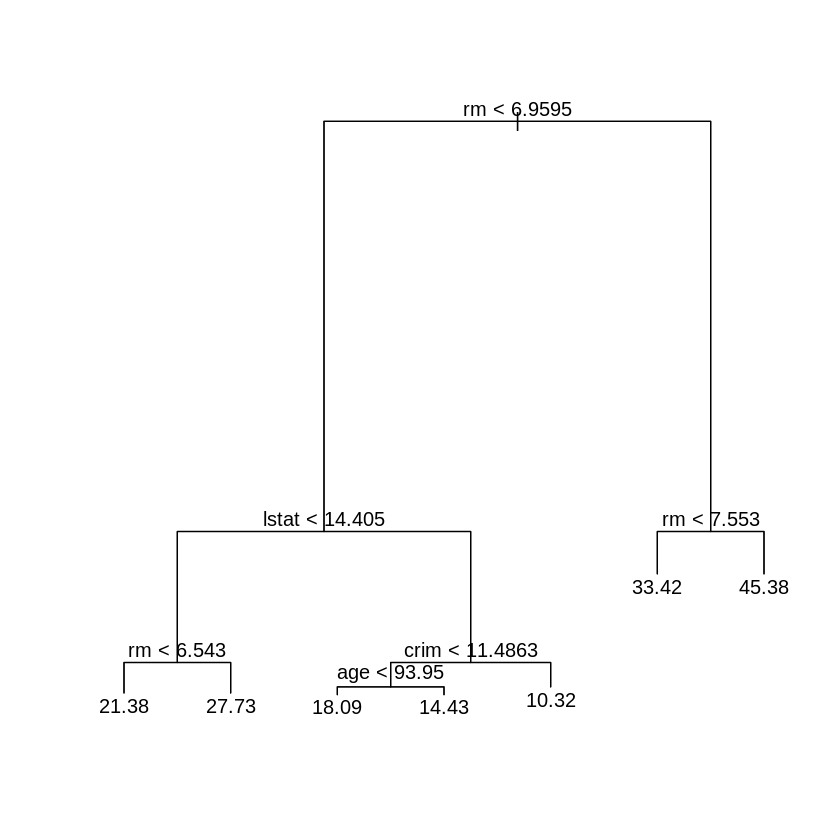

In [11]:
plot(tree.boston)
text(tree.boston , pretty = 0)

Ahora usamos la función cv.tree() para ver si la poda del árbol mejora el rendimiento.

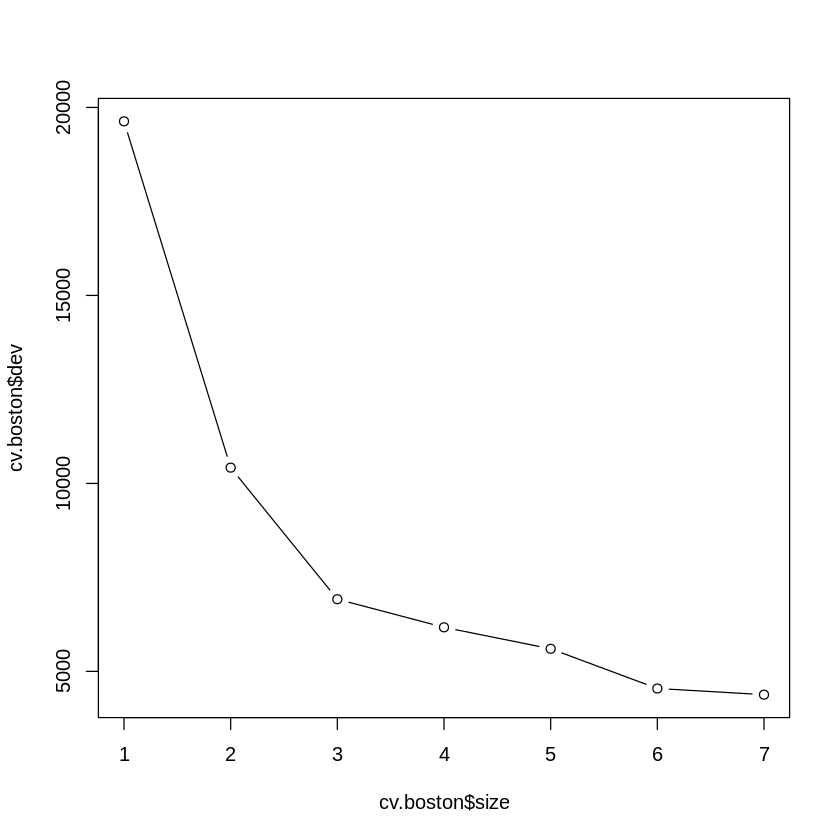

In [12]:
cv.boston <- cv.tree(tree.boston)
plot(cv.boston$size , cv.boston$dev, type = "b")

En este caso, el árbol más complejo considerado se selecciona mediante validación cruzada. Sin embargo, si deseamos podar el árbol, podríamos hacerlo de la siguiente manera utilizando la función prune.tree():

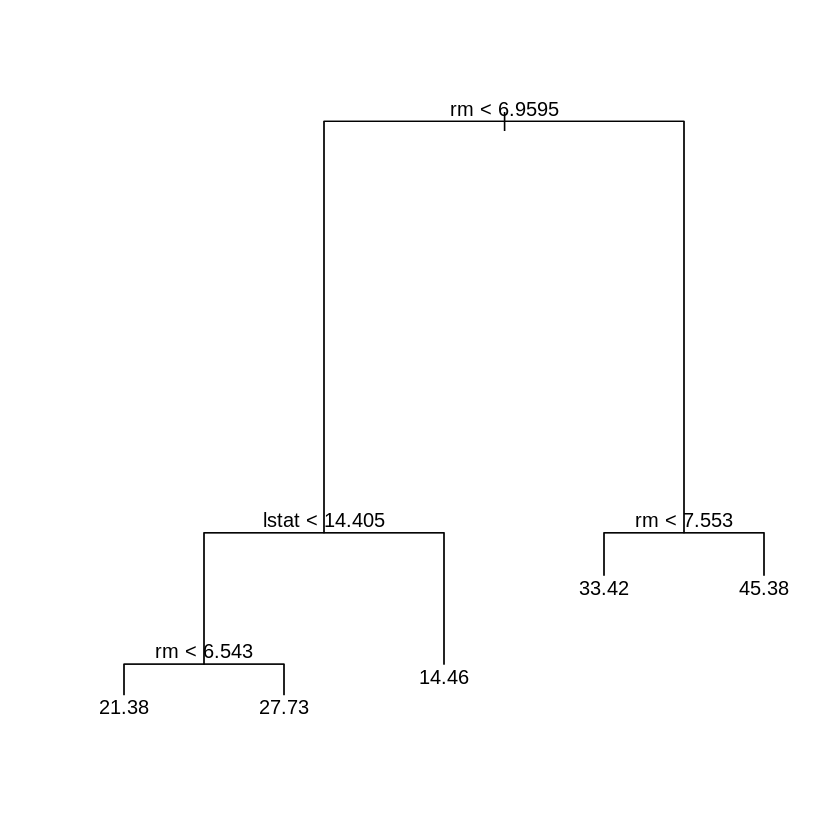

In [13]:
prune.boston <- prune.tree(tree.boston , best = 5)
plot(prune.boston)
text(prune.boston , pretty = 0)

En consonancia con los resultados de la validación cruzada, utilizamos el árbol sin podar para hacer predicciones en el dataset de pruebas.

In [15]:
yhat <- predict(tree.boston , newdata = Boston[-train , ])
boston.test <- Boston[-train, "medv"]
mean((yhat - boston.test)^2)

[1] 35.28688

En otras palabras, el MSE del conjunto de prueba asociado al árbol de regresión es de 35,29. La raíz cuadrada del MSE se sitúa alrededor de 5,941, lo que indica que este modelo  conduce a predicciones de prueba que están (en promedio) dentro de aproximadamente $5,941 del verdadero valor medio de la vivienda.

## **RANDOM FOREST**

In [16]:
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



In [18]:
set.seed(1)
bag.boston <- randomForest(medv ~ ., data = Boston , subset = train, mtry = 12, importance = TRUE)
bag.boston


Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 12, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 12

          Mean of squared residuals: 11.10176
                    % Var explained: 85.56

El argumento mtry = 12 indica que se deben considerar los 12 predictores para cada división del árbol, en otras palabras, que se debe realizar Bagging. ¿Qué tal funciona este modelo en el dataset de prueba?

[1] 23.38773

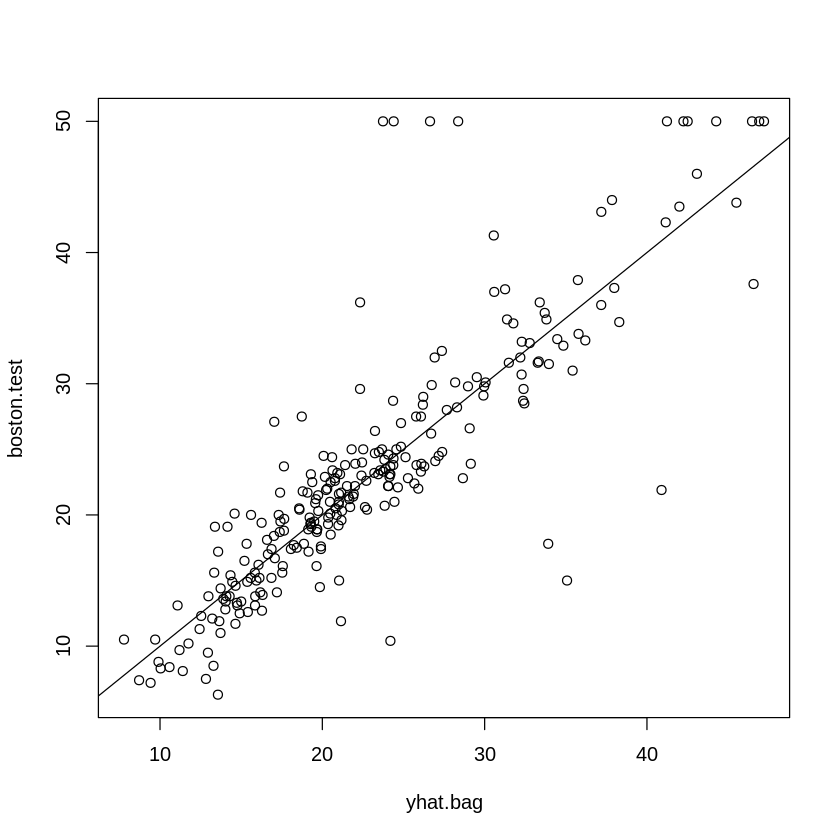

In [19]:
yhat.bag <- predict(bag.boston , newdata = Boston[-train , ])
plot(yhat.bag , boston.test)
abline(0, 1)
mean((yhat.bag - boston.test)^2)

El MSE del conjunto de pruebas asociado al árbol de regresión de Bagging es de 23,42, aproximadamente dos tercios del obtenido utilizando un árbol único podado de forma óptima.

El crecimiento de un Random Forest procede exactamente de la misma manera, excepto que utilizamos un valor menor del argumento mtry. Por defecto, randomForest() utiliza p/3 variables cuando es regresión, y RAIZ(p) cuando es  clasificación. En este caso usamos mtry = 6.

In [21]:
set.seed(1)
rf.boston <- randomForest(medv ~ ., data = Boston , subset = train , mtry = 6, importance = TRUE)
yhat.rf <- predict(rf.boston, newdata = Boston[-train, ])
mean((yhat.rf - boston.test)^2)

[1] 19.62021

El MSE del conjunto de prueba es de 19,62, lo que indica que los Random Forests han mejorado al Bagging en este caso.

Mediante la función importance(), podemos ver la importancia de cada variable.

In [22]:
importance(rf.boston)

,%IncMSE,IncNodePurity
crim,16.697017,1076.08786
zn,3.625784,88.35342
indus,4.968621,609.53356
chas,1.061432,52.21793
nox,13.518179,709.87339
rm,32.343305,7857.65451
age,13.272498,612.21424
dis,9.032477,714.94674
rad,2.878434,95.80598
tax,9.118801,364.92479


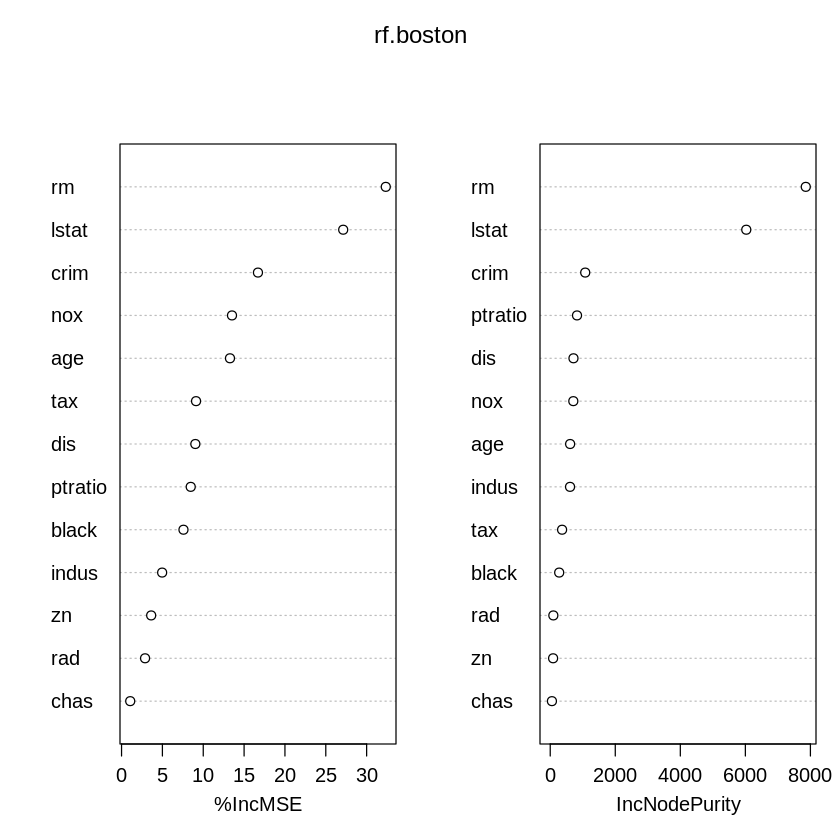

In [23]:
varImpPlot(rf.boston)

## **BOOSTING**

Aquí utilizamos el paquete gbm, y dentro de él la función gbm(), para ajustar árboles de Boosting para regresión.  Ejecutamos gbm() con la opción distribution =
gaussian", ya que se trata de un problema de regresión, para un problema de clasificación binaria, utilizaríamos la distribución = "bernoulli". El argumento n.trees = 5000 indica que queremos 5000 árboles, y la opción opción interaction.depth = 4 limita la profundidad de cada árbol.

In [24]:
install.packages("gbm")
library(gbm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loaded gbm 2.1.8.1



In [47]:
set.seed(12345678)
boost.boston <- gbm(medv ~ ., data = Boston[train , ], distribution = "gaussian", n.trees = 5000, interaction.depth = 4)

,var,rel.inf
,<chr>,<dbl>
rm,rm,41.76239382
lstat,lstat,36.63865322
crim,crim,4.10700308
dis,dis,3.77470943
nox,nox,2.81459391
black,black,2.75889117
age,age,2.22740579
ptratio,ptratio,2.13498216
tax,tax,1.67633978


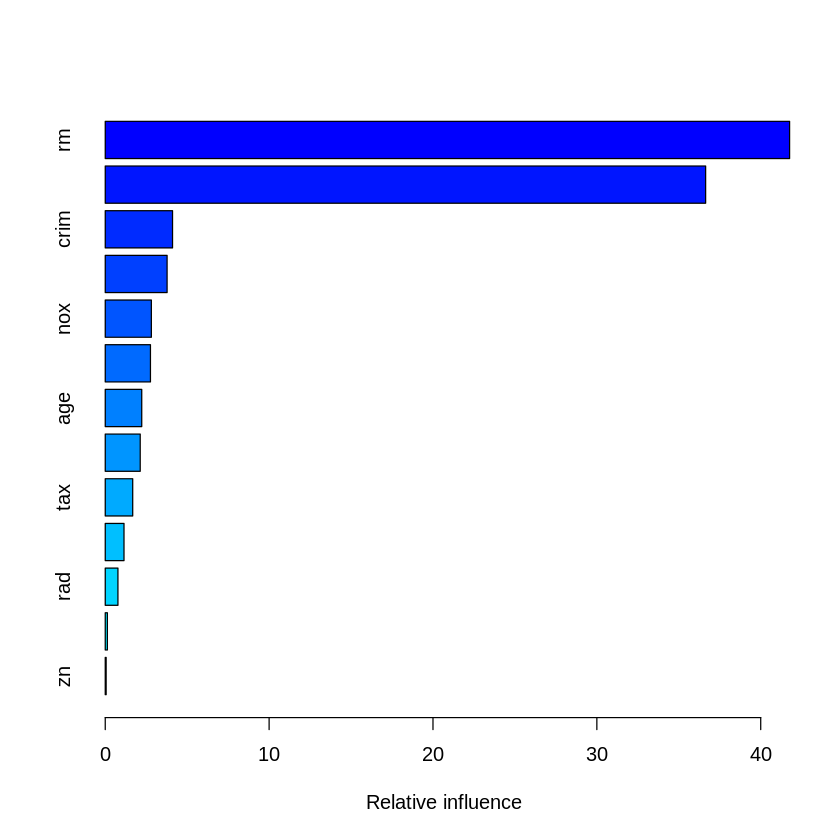

In [43]:
summary(boost.boston)

Vemos que lstat y rm son de lejos, las variables más importantes. También podemos generar gráficas
de dependencia parcial para estas dos variables. Estos gráficos de dependencia ilustran el efecto marginal de las variables seleccionadas sobre la respuesta después de
de sacar las otras variables. En este caso, como cabría esperar, la mediana de los precios de la vivienda aumenta con rm y disminuye con lstat.


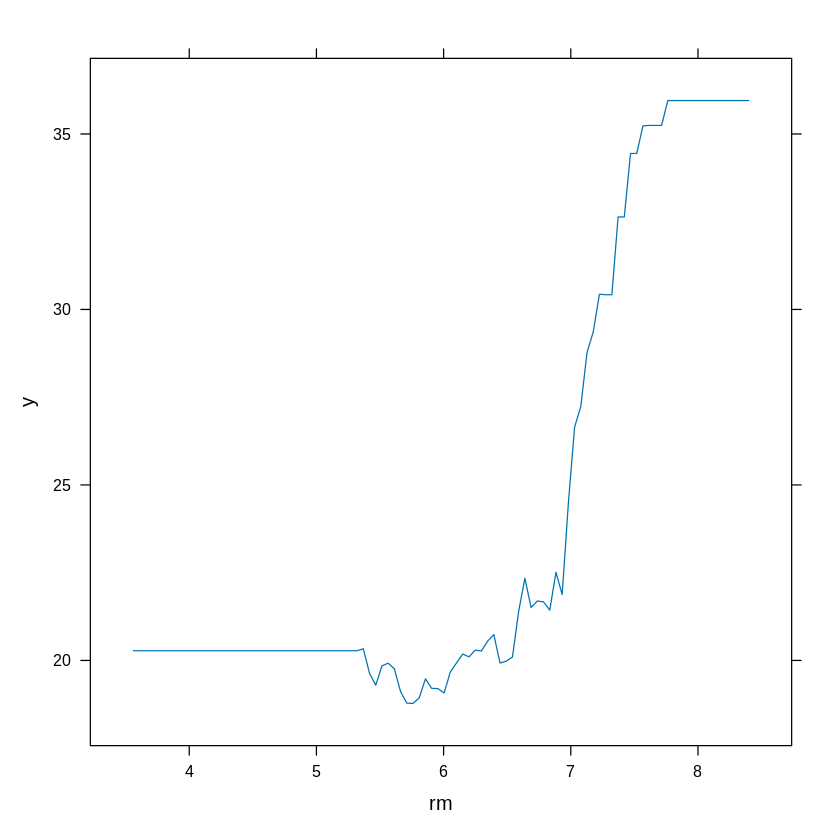

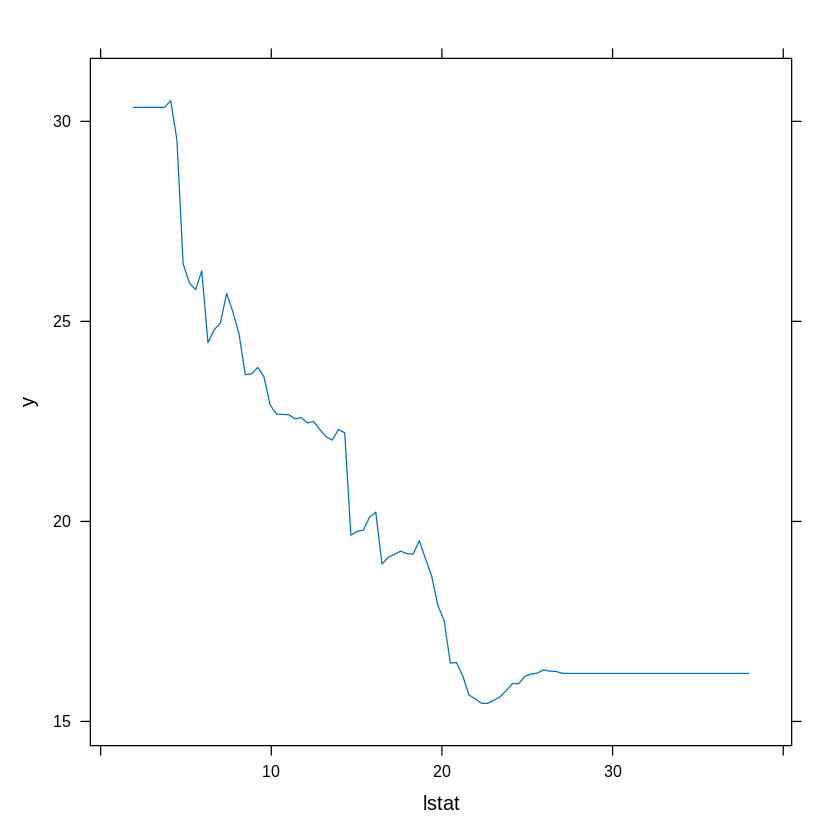

In [44]:
plot(boost.boston , i = "rm")
plot(boost.boston , i = "lstat")

In [48]:
yhat.boost <- predict(boost.boston , newdata = Boston[-train , ], n.trees = 5000)
mean((yhat.boost - boston.test)^2)

[1] 16.98646

El MSE de prueba obtenido es de 16.98, superior al MSE de prueba del Random Forest y del Bagging.